In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X = mnist.data
y = mnist.target

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
X.shape, y.shape

((70000, 784), (70000,))

In [4]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=60_000)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

In [5]:
from sklearn.ensemble import RandomForestClassifier
import time

t0 = time.monotonic()
rnd_forest_clf = RandomForestClassifier(n_estimators=100)
rnd_forest_clf.fit(X_train, y_train)
t1 = time.monotonic()

print(t1 - t0)

77.5575372809999


In [8]:
from sklearn.metrics import accuracy_score, recall_score
y_pred = rnd_forest_clf.predict(X_test)
print(accuracy_score(y_test, y_pred), recall_score(y_test, y_pred,average='macro'))

0.9714 0.9712899531084812


In [10]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_) 
d = np.argmax(cumsum >= 0.95) + 1 # d equals 154

In [11]:
d

154

In [12]:
pca = PCA(n_components=0.95)
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_) 
d = np.argmax(cumsum >= 0.95) + 1 # d equals 154
d

154

In [14]:
X_r = pca.transform(X_train)

In [15]:
t0 = time.monotonic()
rnd_forest_pca_clf = RandomForestClassifier(n_estimators=100)
rnd_forest_pca_clf.fit(X_r, y_train)
t1 = time.monotonic()

print(t1 - t0)

138.44708405100027


In [17]:
y_pred_pca = rnd_forest_pca_clf.predict(pca.transform(X_test))
print(accuracy_score(y_test, y_pred_pca), recall_score(y_test, y_pred_pca, average='macro'))

0.9508 0.950547906903226


In [18]:
from sklearn.linear_model import SGDClassifier

t0 = time.monotonic()
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)
t1 = time.monotonic()

In [19]:
print(t1 - t0)

174.555137071


In [20]:
y_pred_sgd = sgd_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_sgd), recall_score(y_test, y_pred_sgd, average='macro'))

0.8717 0.8706794141287878


In [21]:
t0 = time.monotonic()
sgd_clf_pca = SGDClassifier()
sgd_clf_pca.fit(X_r, y_train)
t1 = time.monotonic()
print(t1 - t0)

47.00000607700076


In [22]:
y_pred_sgd_pca = sgd_clf_pca.predict(pca.transform(X_test))
print(accuracy_score(y_test, y_pred_sgd_pca), recall_score(y_test, y_pred_sgd_pca, average='macro'))

0.8926 0.8906239942273236


№10

In [77]:
X_sample, y_sample = X_train[:5000], y_train[:5000]

In [78]:
from sklearn.manifold import TSNE, MDS, Isomap

tsne = TSNE(n_components=2, init="random", learning_rate="auto",
            random_state=42)
mnist2d_tsne = tsne.fit_transform(X_sample)

isomap = Isomap(n_components=2)
mnist2d_isomap = isomap.fit_transform(X_sample)

pca_2d = PCA(n_components=2)
mnist2d_pca = pca_2d.fit_transform(X_sample)

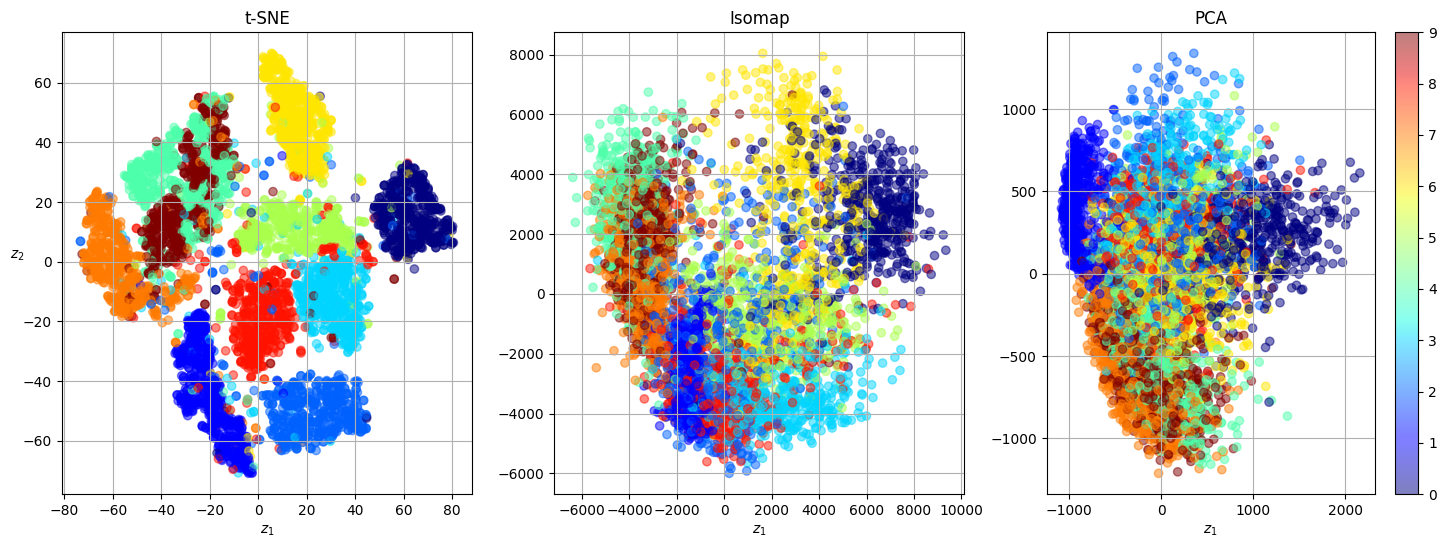

In [81]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(5, 5))
# colors = np.random.rand(10)
# ax = fig.add_subplot(111, projection='3d')
# plt.title("reduced mnist to 2d")

# for i in range(10):
#   plt.scatter(mnist2d_tsne[:, 0][y_train[:5000]==str(i)], mnist2d_tsne[:, 1][y_train[:5000]==str(i)])
# plt.xlabel("$z_1$")
# plt.ylabel("$z_2$", rotation=0)
# plt.grid(True)

titles = ["t-SNE", "Isomap", "PCA" ]

plt.figure(figsize=(18, 6))

for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                     (mnist2d_tsne, mnist2d_isomap, mnist2d_pca)):
    plt.subplot(subplot)
    plt.title(title)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_sample.astype(np.int8), cmap="jet", alpha=0.5)
    plt.xlabel("$z_1$")
    if subplot == 131:
        plt.ylabel("$z_2$", rotation=0)
    plt.grid(True)

plt.colorbar()
plt.show()

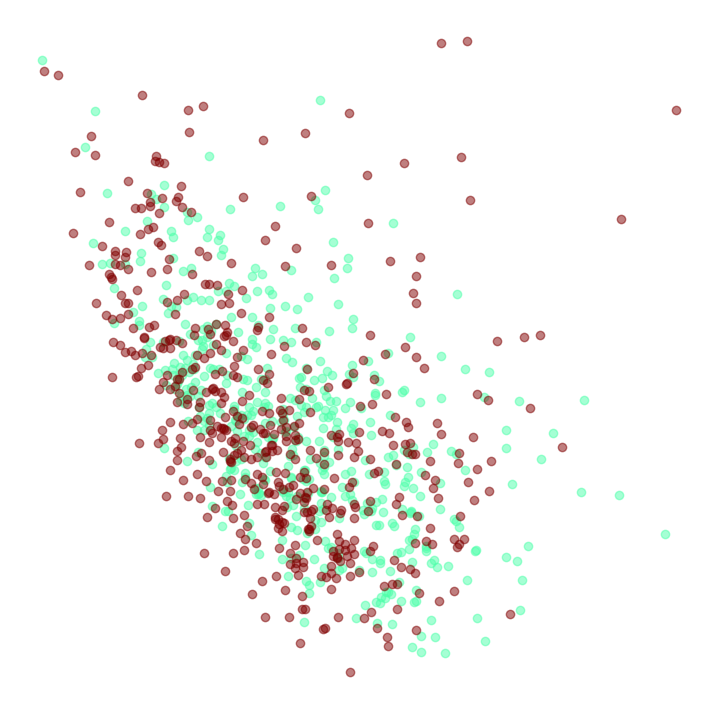

In [82]:
plt.figure(figsize=(9, 9))
cmap = plt.cm.jet
for digit in ('4', '9'):
    plt.scatter(X_reduced[y_sample == digit, 0], X_reduced[y_sample == digit, 1],
                c=[cmap(float(digit) / 9)], alpha=0.5)
plt.axis('off')
plt.show()

In [ ]:
titles = ["t-SNE", "Isomap", "PCA" ]

plt.figure(figsize=(18, 6))

for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                     (mnist2d_tsne, mnist2d_isomap, mnist2d_pca)):
    plt.subplot(subplot)
    plt.title(title)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_sample.astype(np.int8), cmap="jet", alpha=0.5)
    
    plt.xlabel("$z_1$")
    if subplot == 131:
        plt.ylabel("$z_2$", rotation=0)
    plt.grid(True)

plt.colorbar()
plt.show()

In [58]:
tsne3d = TSNE(n_components=3, init="random", learning_rate="auto",
            random_state=42)
mnist3d_tsne = tsne3d.fit_transform(X_train[:5000])

In [69]:
def set_xyz_axes(ax, axes):
    ax.xaxis.set_rotate_label(False)
    ax.yaxis.set_rotate_label(False)
    ax.zaxis.set_rotate_label(False)
    ax.set_xlabel("$x_1$", labelpad=8, rotation=0)
    ax.set_ylabel("$x_2$", labelpad=8, rotation=0)
    ax.set_zlabel("$x_3$", labelpad=8, rotation=0)
    ax.set_xlim(axes[0:2])
    ax.set_ylim(axes[2:4])
    ax.set_zlim(axes[4:6])

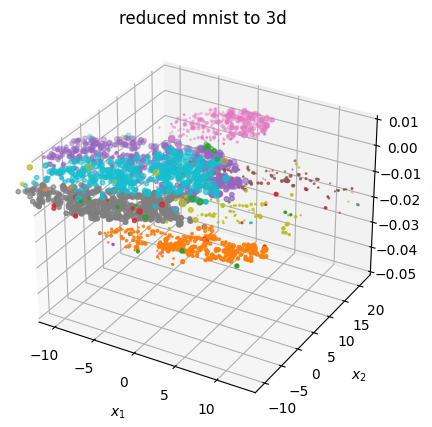

In [71]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')

plt.title("reduced mnist to 3d")
axes = [-11.5, 14, -12, 23, -0.05, 0.01]
for i in range(10):
  plt.scatter(mnist3d_tsne[:, 0][y_train[:5000]==str(i)], mnist3d_tsne[:, 1][y_train[:5000]==str(i)], mnist3d_tsne[:, 2][y_train[:5000]==str(i)])
  
plt.xlabel("$z_1$")
plt.ylabel("$z_2$", rotation=0)
set_xyz_axes(ax, axes)
plt.grid(True)


plt.show()